# Week 7 Data acqusition from Biosemi

In [110]:
# import require library for preprocess
import mne
import numpy as np
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from mne.datasets import eegbci
import scipy
import pickle
import seaborn as sns
from scipy.signal import filtfilt
import pyxdf

# import require library for classification
from sklearn.svm import SVC # SVM library
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # LDA library
from sklearn.neighbors import KNeighborsClassifier # KNN library

from sklearn.metrics import classification_report,confusion_matrix # Result representation

## 1 Read recorded data from Biosemi (bdf file)

In [111]:
import pandas as pd
def load_data(file_path):
    df = pd.read_csv(file_path)
    response = df.get(key="response.keys")
    response = response[1:-2]
    data_response = response.to_numpy()
    return data_response

data_response1 = load_data('psychopy_data_fromlab/csv_label/tailab1.csv')
data_response2 = load_data('psychopy_data_fromlab/csv_label/tailab2.csv')
data_response3 = load_data('psychopy_data_fromlab/csv_label/tailab3.csv')
data_response4 = load_data('psychopy_data_fromlab/csv_label/tailab4.csv')
data_response5 = load_data('psychopy_data_fromlab/csv_label/tailab5.csv')

In [112]:
# read biosami file (bdf)
raw_bio1 = mne.io.read_raw_bdf("databiosemi/s101_b1.bdf", preload=True)
raw_bio2 = mne.io.read_raw_bdf("databiosemi/s101_b2_1.bdf", preload=True)
raw_bio3 = mne.io.read_raw_bdf("databiosemi/s101_b3.bdf", preload=True)
raw_bio4 = mne.io.read_raw_bdf("databiosemi/s101_b4.bdf", preload=True)
raw_bio5 = mne.io.read_raw_bdf("databiosemi/s101_b5.bdf", preload=True)

raw = mne.io.read_raw_bdf("databiosemi/s101_b1.bdf", preload=True)

eegbci.standardize(raw_bio1)
eegbci.standardize(raw_bio2)
eegbci.standardize(raw_bio3)
eegbci.standardize(raw_bio4)
eegbci.standardize(raw_bio5)

# Set channel location for data

montage = make_standard_montage("biosemi64")
raw_bio1.set_montage(montage, on_missing='ignore')
raw_bio2.set_montage(montage, on_missing='ignore')
raw_bio3.set_montage(montage, on_missing='ignore')
raw_bio4.set_montage(montage, on_missing='ignore')
raw_bio5.set_montage(montage, on_missing='ignore')

Extracting EDF parameters from c:\Users\Aitthikit\Desktop\bci_code\databiosemi\s101_b1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 132607  =      0.000 ...   258.998 secs...
Extracting EDF parameters from c:\Users\Aitthikit\Desktop\bci_code\databiosemi\s101_b2_1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 121343  =      0.000 ...   236.998 secs...
Extracting EDF parameters from c:\Users\Aitthikit\Desktop\bci_code\databiosemi\s101_b3.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 131071  =      0.000 ...   255.998 secs...
Extracting EDF parameters from c:\Users\Aitthikit\Desktop\bci_code\databiosemi\s101_b4.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 130047  =      0.000 ...   253.998 secs...
Extracting EDF parameters from c:\Users\Aitthikit\Desktop\bci_

<RawEDF | s101_b5.bdf, 73 x 127488 (249.0 s), ~71.1 MiB, data loaded>

In [113]:
raw_bio1 = raw_bio1.resample(128, verbose = False)
raw_bio2 = raw_bio2.resample(128, verbose = False)
raw_bio3 = raw_bio3.resample(128, verbose = False)
raw_bio4 = raw_bio4.resample(128, verbose = False)
raw_bio5 = raw_bio5.resample(128, verbose = False)

raw_bio5

<RawEDF | s101_b5.bdf, 73 x 31872 (249.0 s), ~17.8 MiB, data loaded>

**check channel names**

['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'STATUS']


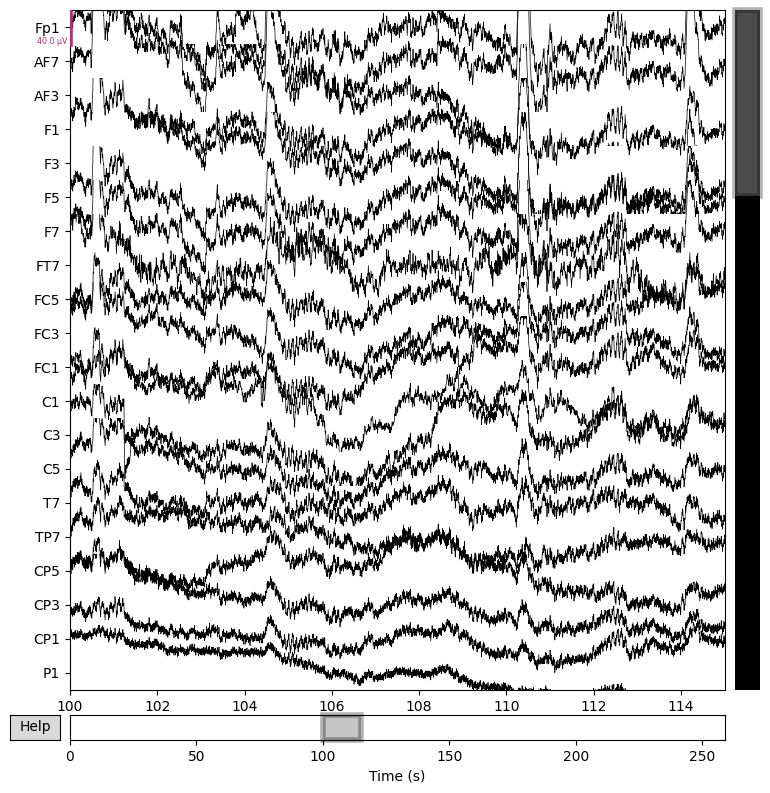

...
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'STATUS']


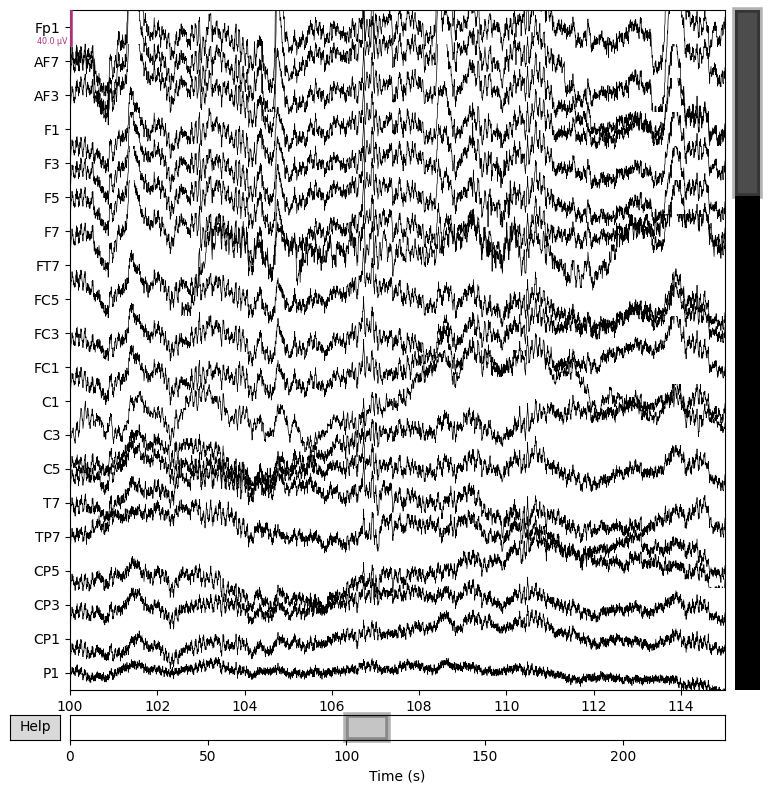

...
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'STATUS']


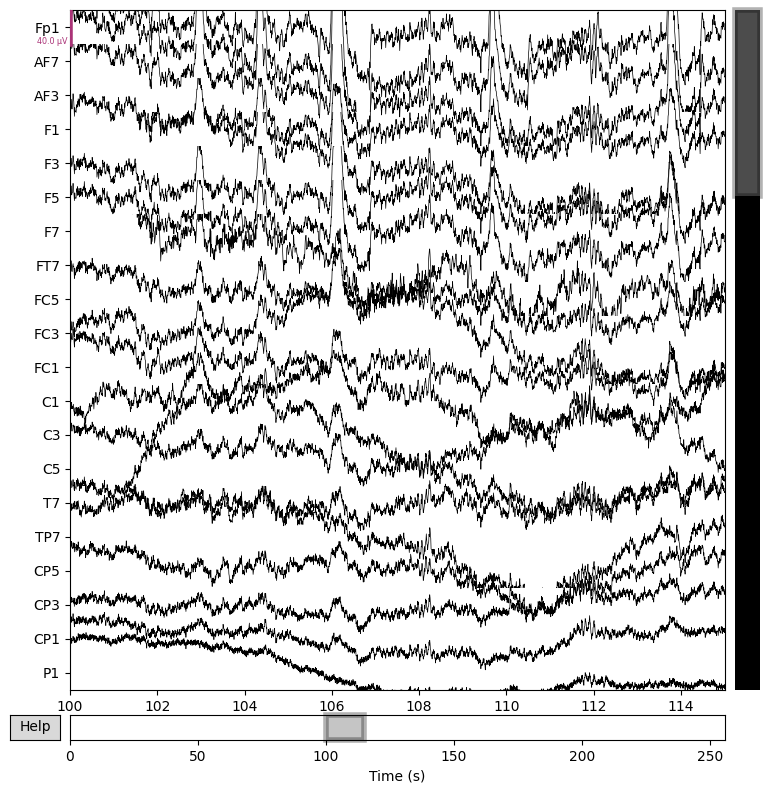

...
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'STATUS']


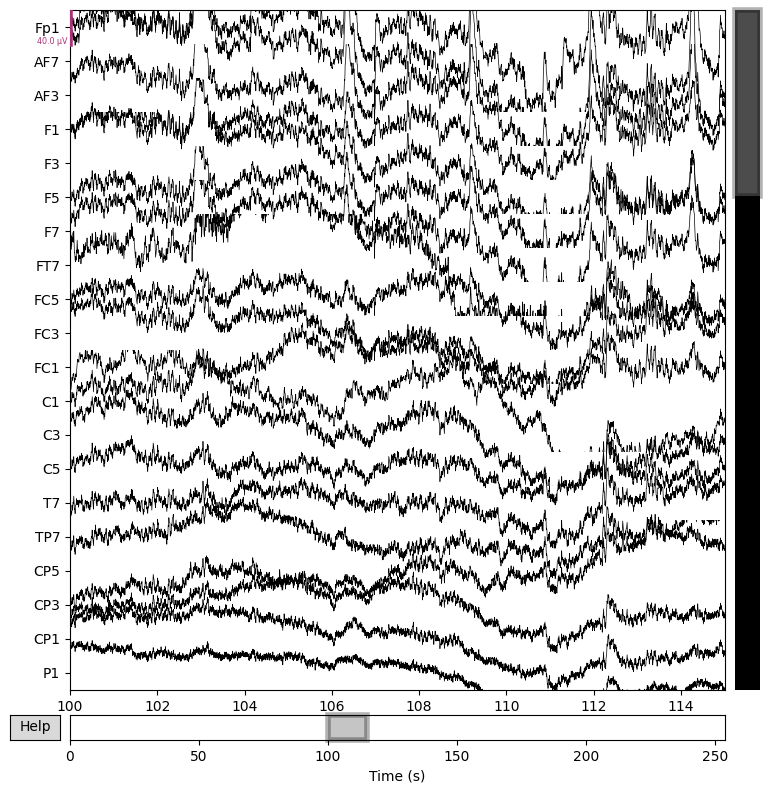

...
['Fp1', 'AF7', 'AF3', 'F1', 'F3', 'F5', 'F7', 'FT7', 'FC5', 'FC3', 'FC1', 'C1', 'C3', 'C5', 'T7', 'TP7', 'CP5', 'CP3', 'CP1', 'P1', 'P3', 'P5', 'P7', 'P9', 'PO7', 'PO3', 'O1', 'Iz', 'Oz', 'POz', 'Pz', 'CPz', 'Fpz', 'Fp2', 'AF8', 'AF4', 'AFz', 'Fz', 'F2', 'F4', 'F6', 'F8', 'FT8', 'FC6', 'FC4', 'FC2', 'FCz', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP8', 'CP6', 'CP4', 'CP2', 'P2', 'P4', 'P6', 'P8', 'P10', 'PO8', 'PO4', 'O2', 'EXG1', 'EXG2', 'EXG3', 'EXG4', 'EXG5', 'EXG6', 'EXG7', 'EXG8', 'STATUS']


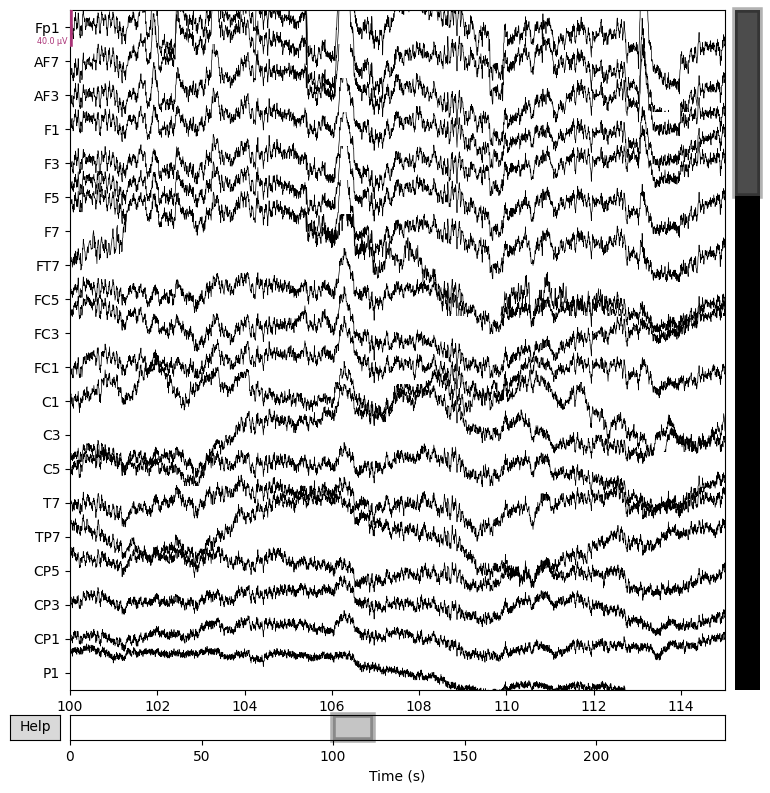

...


In [114]:
all_raw_bio = [raw_bio1, raw_bio2, raw_bio3, raw_bio4, raw_bio5]
for i in all_raw_bio:
    print(i.ch_names)
    i.plot(start = 100, duration = 15)
    print('...')
   

In [136]:
import mne

# 1. Select only standard 10-20 EEG channels
eeg_chs = [ch for ch in raw_bio1.ch_names if ch in montage.ch_names]

raw_eeg1 = raw_bio1.copy().pick_channels(eeg_chs)
raw_eeg2 = raw_bio2.copy().pick_channels(eeg_chs)
raw_eeg3 = raw_bio3.copy().pick_channels(eeg_chs)
raw_eeg4 = raw_bio4.copy().pick_channels(eeg_chs)
raw_eeg5 = raw_bio5.copy().pick_channels(eeg_chs)

raw_eeg1.set_montage(montage)
raw_eeg2.set_montage(montage)
raw_eeg3.set_montage(montage)
raw_eeg4.set_montage(montage)
raw_eeg5.set_montage(montage)

# print(raw_eeg.ch_names)

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawEDF | s101_b5.bdf, 64 x 31872 (249.0 s), ~15.6 MiB, data loaded>

## 2. Apply filter

ICA

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 64 components


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3216960274.py:8: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw_eeg1)


Fitting ICA took 1.5s.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 64 components


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3216960274.py:9: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw_eeg2)


Fitting ICA took 1.6s.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 64 components


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3216960274.py:10: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw_eeg3)


Fitting ICA took 1.4s.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 64 components


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3216960274.py:11: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw_eeg4)


Fitting ICA took 0.9s.
Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by number: 64 components


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3216960274.py:12: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(raw_eeg5)


Fitting ICA took 0.7s.


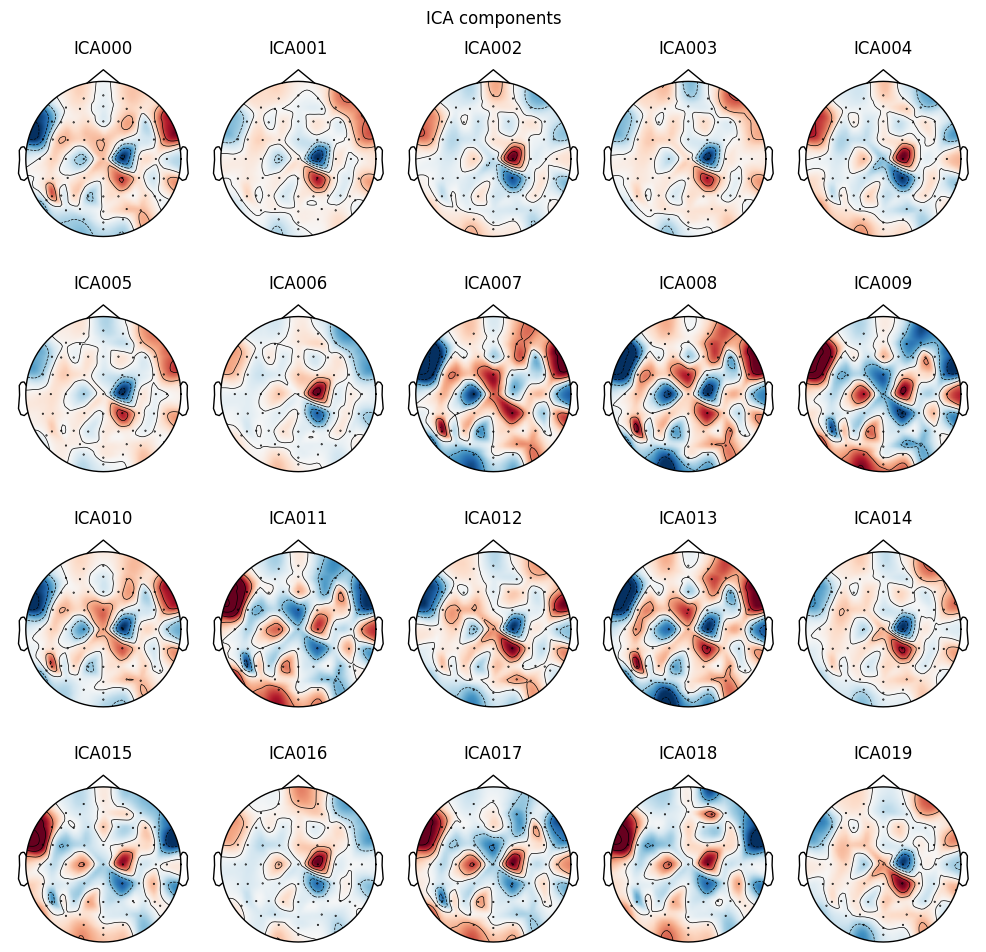

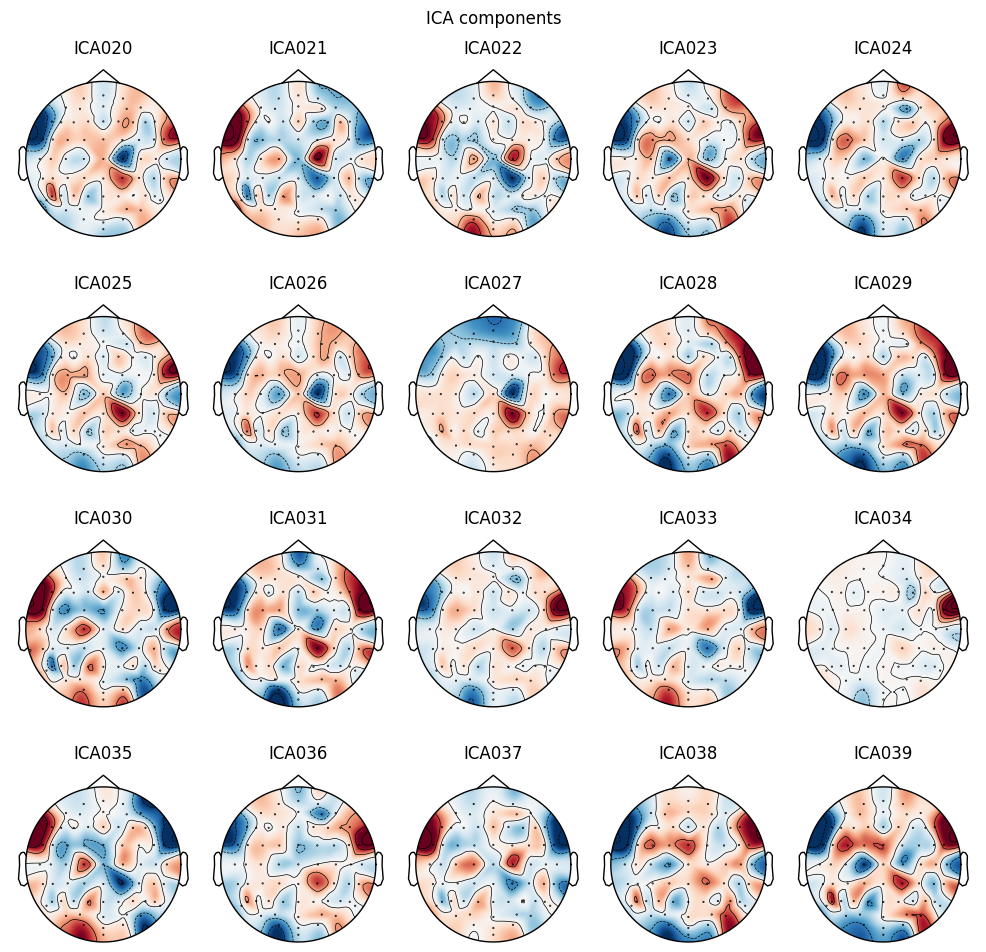

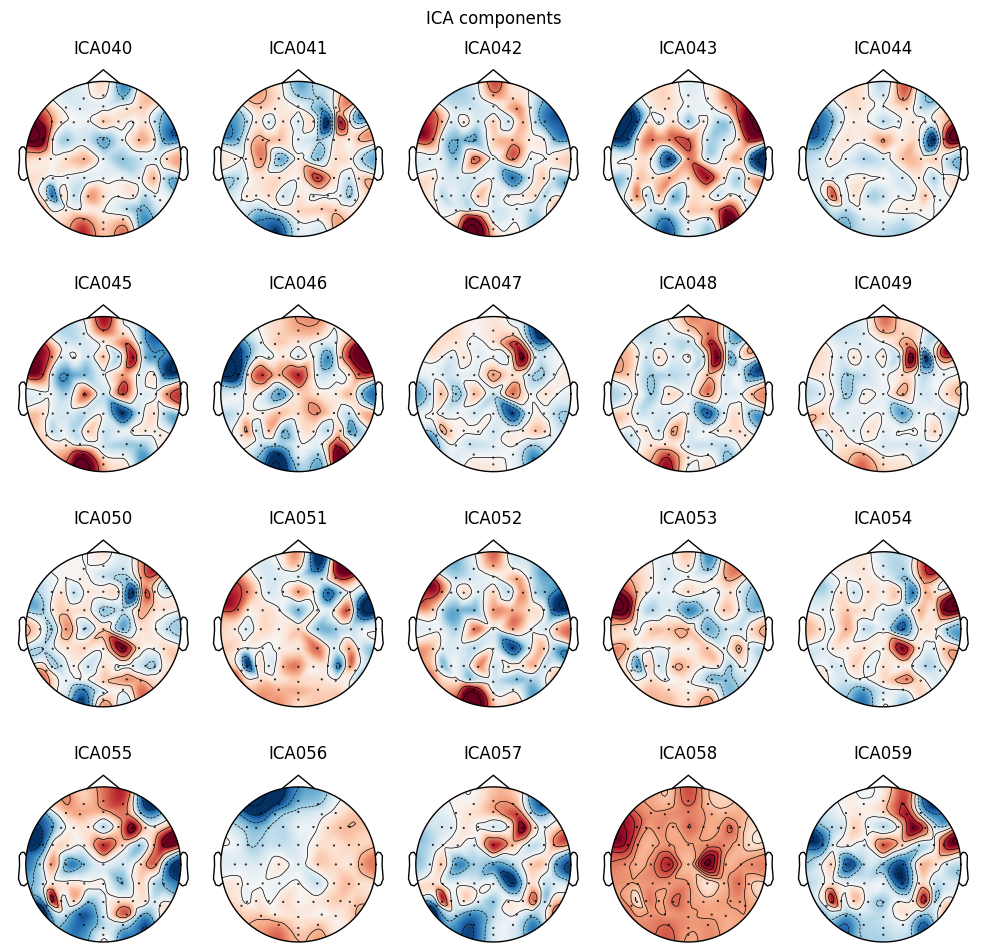

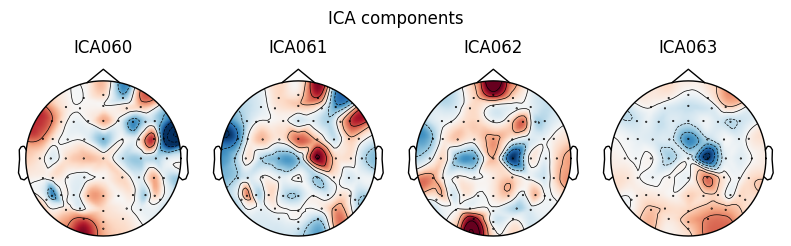

[<MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 975x967 with 20 Axes>,
 <MNEFigure size 780x260.5 with 4 Axes>]

In [137]:
from mne.preprocessing import ICA

# raw.pick_types(eeg=True, exclude='bads')
# raw.set_montage('biosemi64', on_missing='ignore')
# raw.filter(1., 40., fir_design='firwin')
# print(raw.ch_names)
ica = ICA(n_components=64, random_state=97, max_iter='auto')
ica.fit(raw_eeg1)
ica.fit(raw_eeg2)
ica.fit(raw_eeg3)
ica.fit(raw_eeg4)
ica.fit(raw_eeg5)
# ica.fit(raw_bio2)
# ica.fit(raw_bio3)
# ica.fit(raw_bio4)
# ica.fit(raw_bio5)
ica.plot_components()

In [116]:
# ica.plot_components()

**raw data PSD plotting**

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


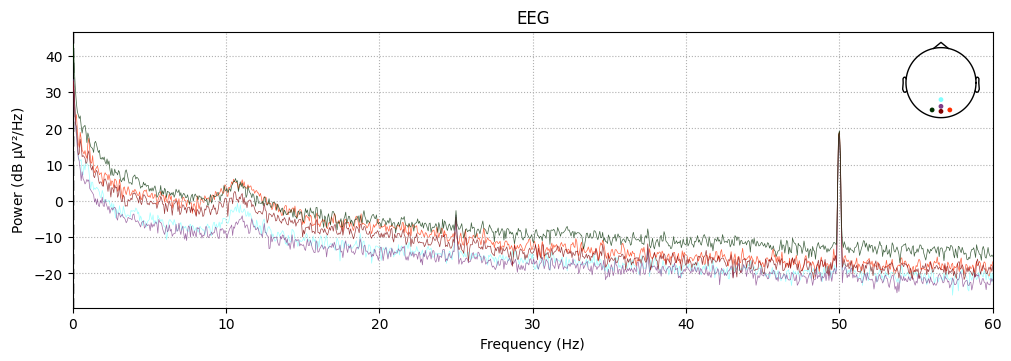

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


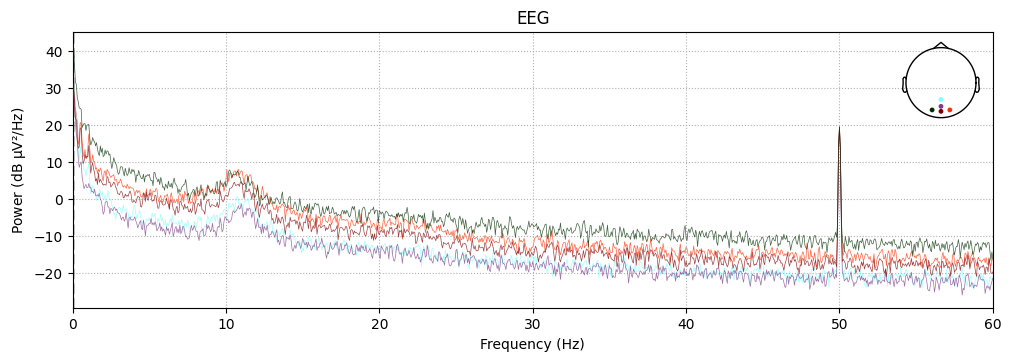

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


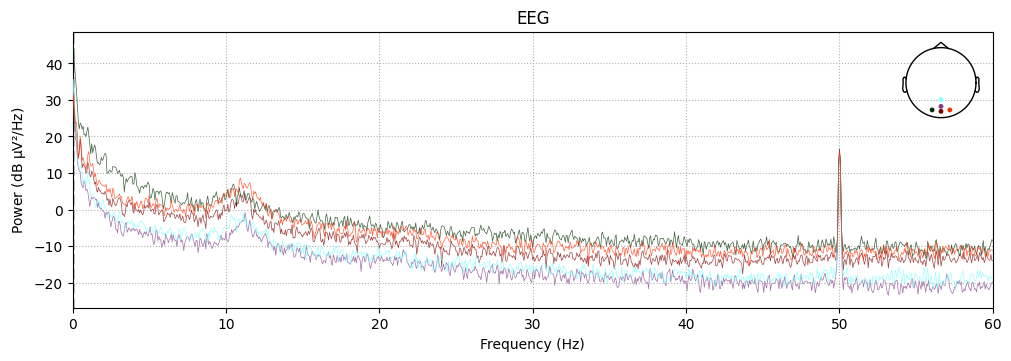

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


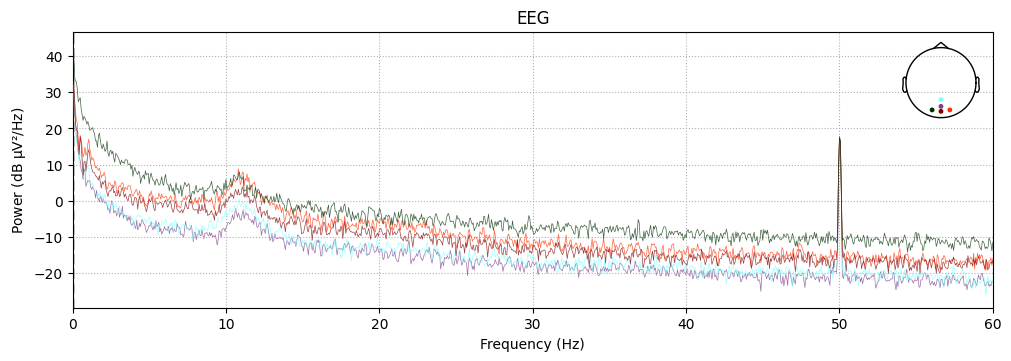

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


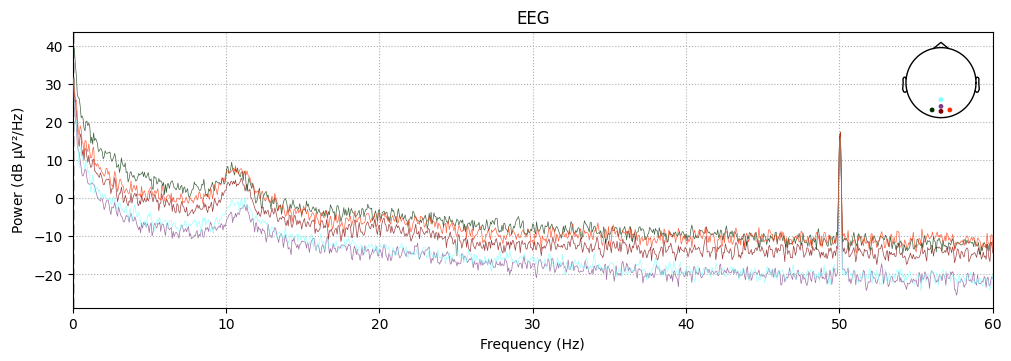

In [117]:
select_channels = ['O1', 'Oz', 'O2', 'Pz', 'POz']
for i in all_raw_bio:
    i.plot_psd(fmax=60, picks=select_channels)
    plt.show()
# raw_bio.compute_psd(fmax=60).plot(picks=select_channels)
# plt.show()

**apply notch and band-pass filter**

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 H

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished


Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 423 samples (3.305 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 845 samples (6.602 s)

Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband ed

[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  71 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  72 out of  72 | elapsed:    0.0s finished
c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Plotting power spectral density (dB=True).
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


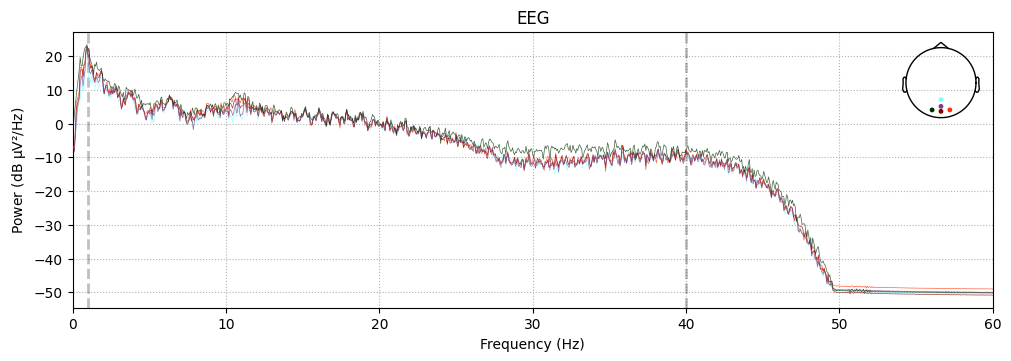

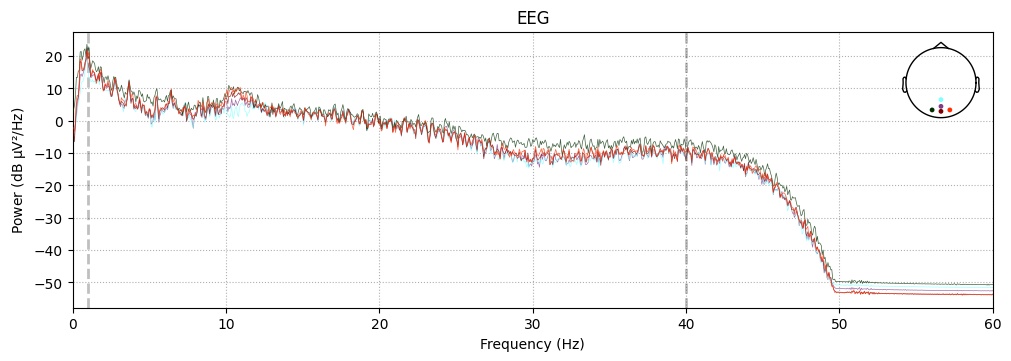

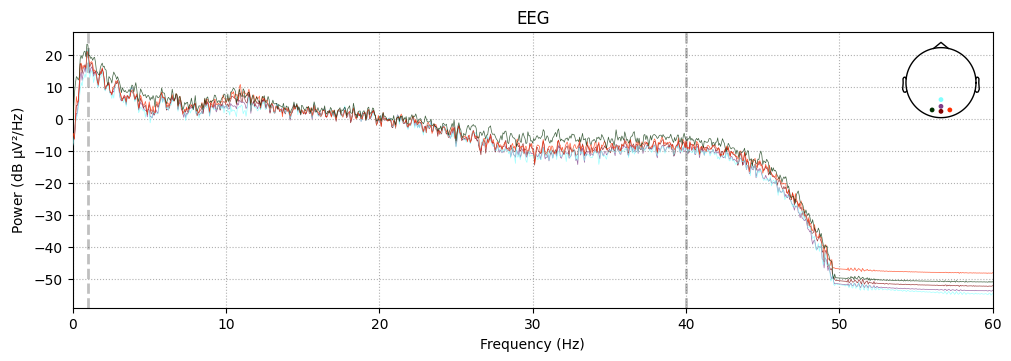

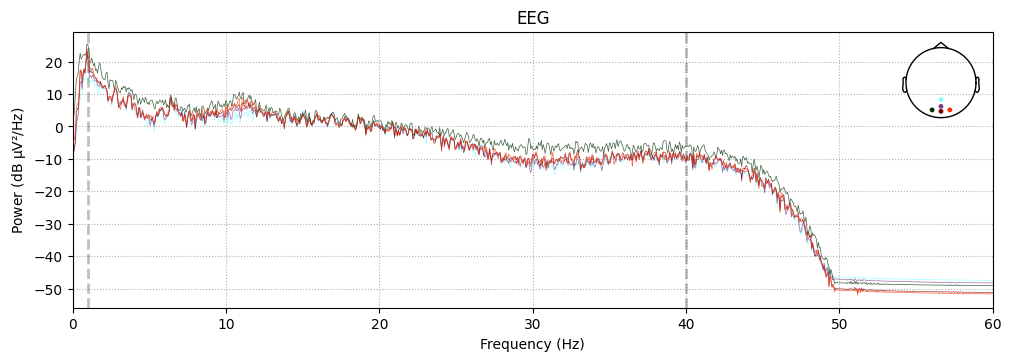

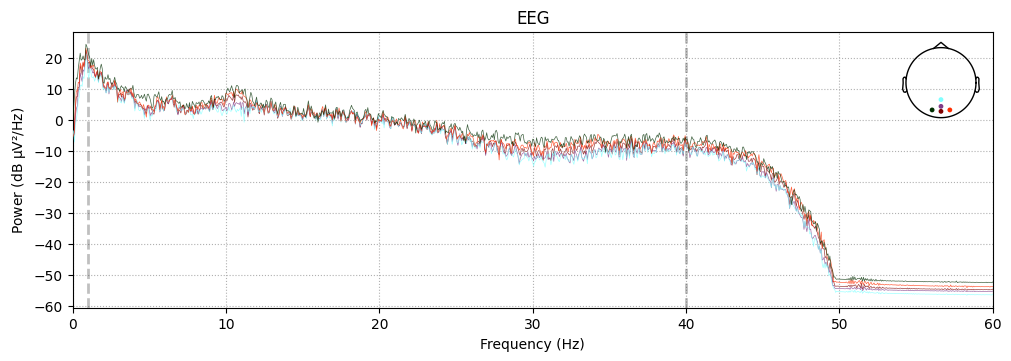

In [118]:
raw_bio1 = raw_bio1.set_eeg_reference('average') 
raw_bio2 = raw_bio2.set_eeg_reference('average')
raw_bio3 = raw_bio3.set_eeg_reference('average')
raw_bio4 = raw_bio4.set_eeg_reference('average')
raw_bio5 = raw_bio5.set_eeg_reference('average')

bio_filter1 = raw_bio1.copy().filter(l_freq=1, h_freq=40) #band-pass function
bio_filter2 = raw_bio2.copy().filter(l_freq=1, h_freq=40) #band-pass function
bio_filter3 = raw_bio3.copy().filter(l_freq=1, h_freq=40) #band-pass function
bio_filter4 = raw_bio4.copy().filter(l_freq=1, h_freq=40) #band-pass function
bio_filter5 = raw_bio5.copy().filter(l_freq=1, h_freq=40) #band-pass function
bio_filter1 = bio_filter1.copy().notch_filter(freqs=50) #notch filter function
bio_filter2 = bio_filter2.copy().notch_filter(freqs=50) #notch filter function
bio_filter3 = bio_filter3.copy().notch_filter(freqs=50) #notch filter function
bio_filter4 = bio_filter4.copy().notch_filter(freqs=50) #notch filter function
bio_filter5 = bio_filter5.copy().notch_filter(freqs=50) #notch filter function
bio_filter1.compute_psd(fmax=60).plot(picks=select_channels)
bio_filter2.compute_psd(fmax=60).plot(picks=select_channels)
bio_filter3.compute_psd(fmax=60).plot(picks=select_channels)
bio_filter4.compute_psd(fmax=60).plot(picks=select_channels)
bio_filter5.compute_psd(fmax=60).plot(picks=select_channels)
plt.show()
# bio_filter = raw_bio.copy().filter(l_freq=1, h_freq=40) #band-pass function
# bio_filter = bio_filter.copy().notch_filter(freqs=50) #notch filter function
# bio_filter.compute_psd(fmax=60).plot(picks=select_channels)
# plt.show()

In [138]:
from mne_icalabel import label_components
ic_labels1 = label_components(raw_bio1, ica, method="iclabel")
ic_labels2 = label_components(raw_bio2, ica, method="iclabel")
ic_labels3 = label_components(raw_bio3, ica, method="iclabel")
ic_labels4 = label_components(raw_bio4, ica, method="iclabel")
ic_labels5 = label_components(raw_bio5, ica, method="iclabel")
print(ic_labels1)
print(ic_labels2)
print(ic_labels3)
print(ic_labels4)
print(ic_labels5)


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\2107358070.py:2: RuntimeWarning: The provided Raw instance is not filtered between 1 and 100 Hz. ICLabel was designed to classify features extracted from an EEG dataset bandpass filtered between 1 and 100 Hz (see the 'filter()' method for Raw and Epochs instances).
  ic_labels1 = label_components(raw_bio1, ica, method="iclabel")
C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\2107358070.py:2: RuntimeWarning: The provided ICA instance was fitted with a 'fastica' algorithm. ICLabel was designed with extended infomax ICA decompositions. To use the extended infomax algorithm, use the 'mne.preprocessing.ICA' instance with the arguments 'ICA(method='infomax', fit_params=dict(extended=True))' (scikit-learn) or 'ICA(method='picard', fit_params=dict(ortho=False, extended=True))' (python-picard).
  ic_labels1 = label_components(raw_bio1, ica, method="iclabel")
C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\2107358070.py:3: Runtim

{'y_pred_proba': array([0.9924051 , 0.9507903 , 0.9391204 , 0.88663703, 0.96705854,
       0.9747354 , 0.9441676 , 0.99223053, 0.9907573 , 0.9862694 ,
       0.9910628 , 0.98584735, 0.9896735 , 0.99245447, 0.95815045,
       0.99091744, 0.94142276, 0.991452  , 0.98802495, 0.9619299 ,
       0.9887754 , 0.9827977 , 0.9890112 , 0.9915143 , 0.99303263,
       0.9934689 , 0.9912478 , 0.98298806, 0.99305266, 0.9879914 ,
       0.99239826, 0.995481  , 0.9859438 , 0.9953687 , 0.83913475,
       0.990047  , 0.9946654 , 0.9936412 , 0.98677874, 0.9882337 ,
       0.9639047 , 0.99739254, 0.99424714, 0.9947638 , 0.95783293,
       0.99684364, 0.99122405, 0.997462  , 0.99302185, 0.96234965,
       0.9975767 , 0.9057421 , 0.991405  , 0.95191896, 0.9889725 ,
       0.99788404, 0.86252743, 0.9794631 , 0.92746747, 0.9920378 ,
       0.9649379 , 0.9778829 , 0.9888747 , 0.7815576 ], dtype=float32), 'labels': ['other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other

# 3. Data Epoching

**Biosemi**

In [121]:
print(data_response1)

['space' nan nan nan nan nan nan 'space' nan 'space' nan nan nan 'space'
 'space' nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan 'space' nan nan nan nan nan nan nan nan nan 'space' nan
 'space' nan 'space' nan 'space' 'space' nan nan nan nan 'space' nan nan
 nan]


In [122]:
events1 = mne.find_events(raw_bio1, shortest_event = 0) #command for get events and timestamp
events2 = mne.find_events(raw_bio2, shortest_event = 0) #command for get events and timestamp
events3 = mne.find_events(raw_bio3, shortest_event = 0) #command for get events and timestamp
events4 = mne.find_events(raw_bio4, shortest_event = 0) #command for get events and timestamp
events5 = mne.find_events(raw_bio5, shortest_event = 0) #command for get events and timestamp

#Define what event numbers is
event_dict =  {'101': 101,
'102': 102}


eventstemp1 = events1.copy()
for i in range(len(events1)):
    if events1[i][2] == 102 and data_response1[i] == 'space':
        events1[i][2] = 102
    elif events1[i][2] == 101 and data_response1[i] == 'space':
        events1[i][2] = 103
    else:
        events1[i][2] = 101
eventstemp2 = events2.copy()
for i in range(len(events2)):
    if events2[i][2] == 102 and data_response2[i] == 'space':
        events2[i][2] = 102
    elif events2[i][2] == 101 and data_response2[i] == 'space':
        events2[i][2] = 103
    else:
        events2[i][2] = 101
eventstemp3 = events3.copy()
for i in range(len(events3)):
    if events3[i][2] == 102 and data_response3[i] == 'space':
        events3[i][2] = 102
    elif events3[i][2] == 101 and data_response3[i] == 'space':
        events3[i][2] = 103
    else:
        events3[i][2] = 101
eventstemp4 = events4.copy()
for i in range(len(events4)):
    if events4[i][2] == 102 and data_response4[i] == 'space':
        events4[i][2] = 102
    elif events4[i][2] == 101 and data_response4[i] == 'space':
        events4[i][2] = 103
    else:
        events4[i][2] = 101
eventstemp5 = events5.copy()
for i in range(len(events5)):
    if events5[i][2] == 102 and data_response5[i] == 'space':
        events5[i][2] = 102
    elif events5[i][2] == 101 and data_response5[i] == 'space':
        events5[i][2] = 103
    else:
        events5[i][2] = 101
k = 0
for i in range(len(events1)):
    if events1[i][2] != eventstemp1[i][2]:
        k += 1
print(k)
for i in range(len(events2)):
    if events2[i][2] != eventstemp2[i][2]:
        k += 1
print(k)
for i in range(len(events3)):
    if events3[i][2] != eventstemp3[i][2]:
        k += 1
print(k)
for i in range(len(events4)):
    if events4[i][2] != eventstemp4[i][2]:
        k += 1
print(k)
for i in range(len(events5)):
    if events5[i][2] != eventstemp5[i][2]:
        k += 1
print(k)

Trigger channel STATUS has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
60 events found on stim channel STATUS
Event IDs: [101 102]
Trigger channel STATUS has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
60 events found on stim channel STATUS
Event IDs: [101 102]
Trigger channel STATUS has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
60 events found on stim channel STATUS
Event IDs: [101 102]
Trigger channel STATUS has a non-zero initial value of 65536 (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
60 events found on stim channel STATUS
Event IDs: [101 102]
Trigger channel STATUS has a non-zero initial value of 65536 (consid

In [141]:
Bio_Epochs1 = mne.Epochs(raw_bio1, events1, 
    tmin= -0.5,  
    tmax= 1.5,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-0.5, 0.0),
    verbose=True
    )
Bio_Epochs2 = mne.Epochs(raw_bio2, events2, 
    tmin= -0.5,  
    tmax= 1.5,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-0.5, 0.0),
    verbose=True
    )
Bio_Epochs3 = mne.Epochs(raw_bio3, events3,
    tmin= -0.5,  
    tmax= 1.5,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-0.5, 0.0),
    verbose=True
    )
Bio_Epochs4 = mne.Epochs(raw_bio4, events4,
    tmin= -0.5,  
    tmax= 1.5,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-0.5, 0.0),
    verbose=True
    )
Bio_Epochs5 = mne.Epochs(raw_bio5, events5,
    tmin= -0.5,  
    tmax= 1.5,    
    event_id=event_dict,
    preload = True,
    event_repeated='drop',
    baseline=(-0.5, 0.0),
    verbose=True
    )


Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 257 original time points ...
0 bad epochs dropped
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 257 original time points ...
0 bad epochs dropped
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 257 original time points ...
0 bad epochs dropped
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 60 events and 257 original time points ...
0 bad epochs dropped
Not setting metadata
60 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preload

In [142]:
Bio_Epochs5

<Epochs | 60 events (all good), -0.5 – 1.5 s (baseline -0.5 – 0 s), ~8.7 MiB, data loaded,
 '101': 49
 '102': 11>

<Epochs | 60 events (all good), -0.5 – 1.5 s (baseline -0.5 – 0 s), ~8.7 MiB, data loaded,
 '101': 48
 '102': 12>


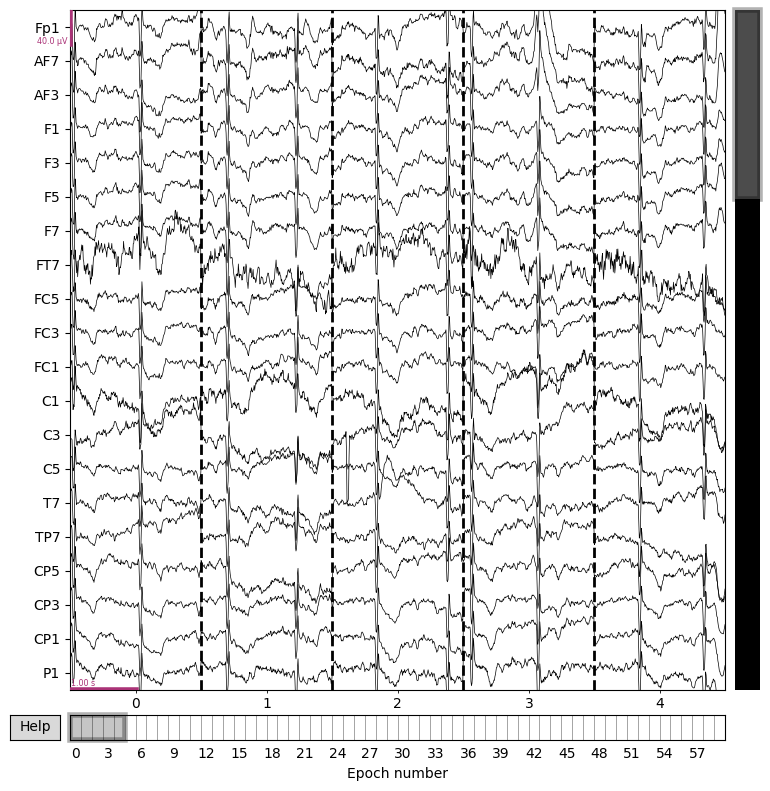

...
<Epochs | 60 events (all good), -0.5 – 1.5 s (baseline -0.5 – 0 s), ~8.7 MiB, data loaded,
 '101': 49
 '102': 11>


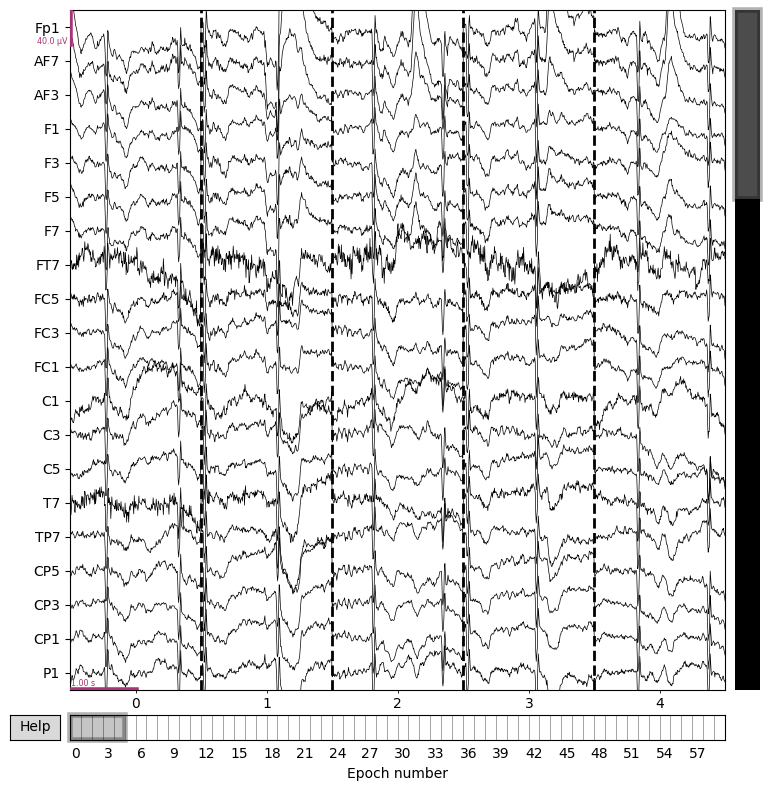

...
<Epochs | 60 events (all good), -0.5 – 1.5 s (baseline -0.5 – 0 s), ~8.7 MiB, data loaded,
 '101': 48
 '102': 12>


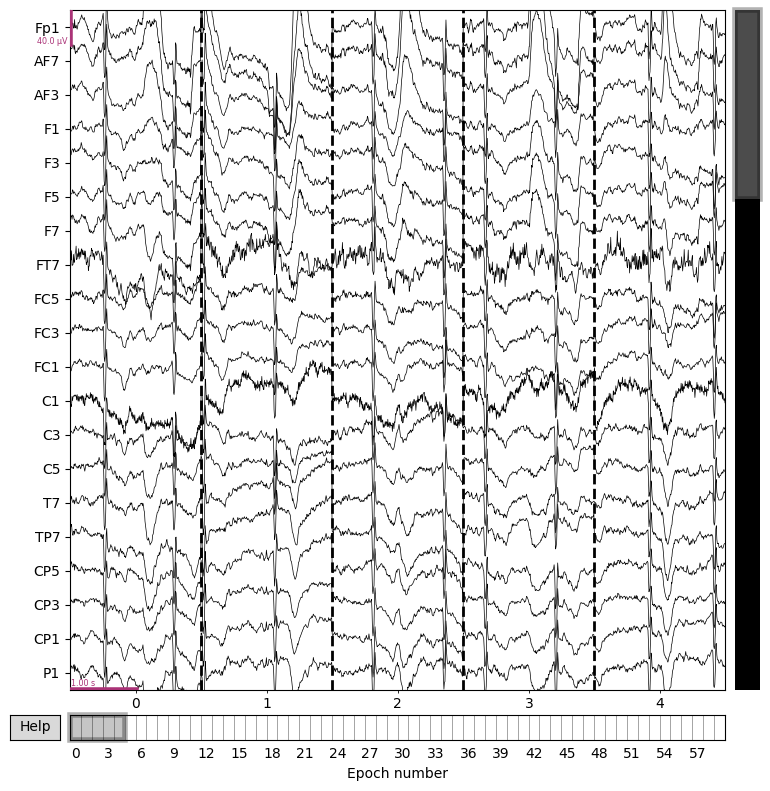

...
<Epochs | 60 events (all good), -0.5 – 1.5 s (baseline -0.5 – 0 s), ~8.7 MiB, data loaded,
 '101': 48
 '102': 12>


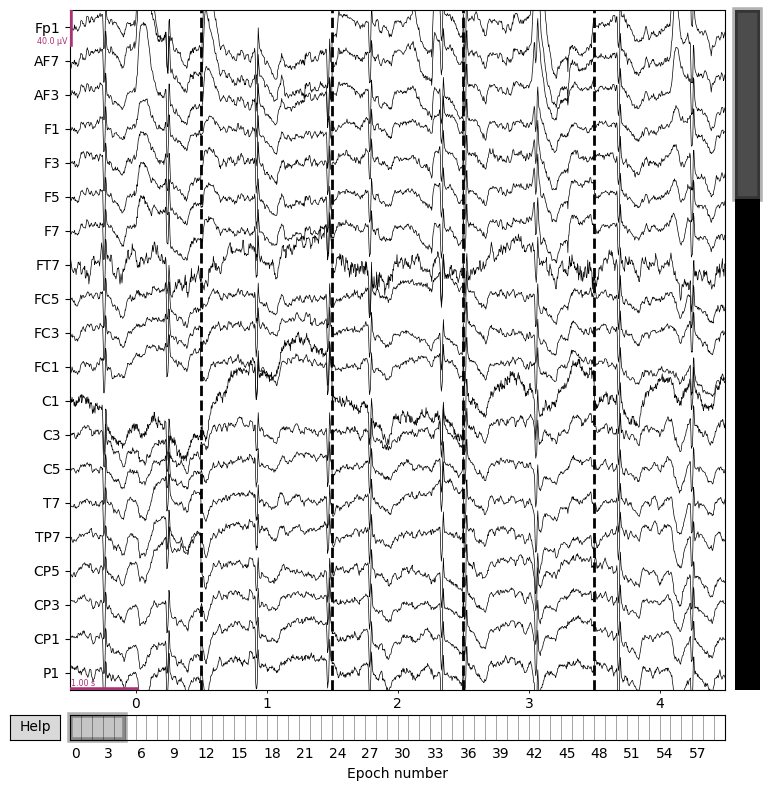

...
<Epochs | 60 events (all good), -0.5 – 1.5 s (baseline -0.5 – 0 s), ~8.7 MiB, data loaded,
 '101': 49
 '102': 11>


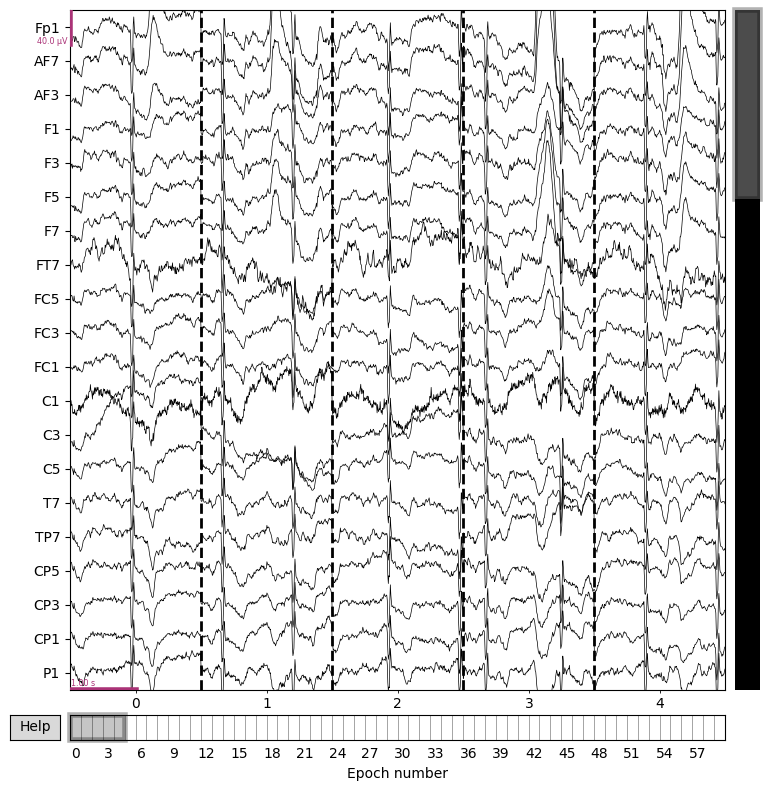

...


In [143]:
All_Bio_Epochs = [Bio_Epochs1, Bio_Epochs2, Bio_Epochs3, Bio_Epochs4, Bio_Epochs5]
for i in All_Bio_Epochs:
    print(i)
    i.plot(n_epochs = 5)
    print('...')
# Bio_Epochs.plot(n_epochs = 5)
# print('...')

In [144]:
from mne import combine_evoked

evoked_target1 = Bio_Epochs1['102'].average()
evoked_target2 = Bio_Epochs2['102'].average()
evoked_target3 = Bio_Epochs3['102'].average()
evoked_target4 = Bio_Epochs4['102'].average()
evoked_target5 = Bio_Epochs5['102'].average()
evoked_target = combine_evoked([evoked_target1, evoked_target2, evoked_target3,evoked_target4,evoked_target5], weights='equal')
# evoked_subtarget = OpenBCI_epochs['101'].average()
evoked_nontarget1 = Bio_Epochs1['101'].average()
evoked_nontarget2 = Bio_Epochs2['101'].average()
evoked_nontarget3 = Bio_Epochs3['101'].average()
evoked_nontarget4 = Bio_Epochs4['101'].average()
evoked_nontarget5 = Bio_Epochs5['101'].average()
evoked_nontarget = combine_evoked([evoked_nontarget1, evoked_nontarget2, evoked_nontarget3,evoked_nontarget4,evoked_nontarget5], weights='equal')

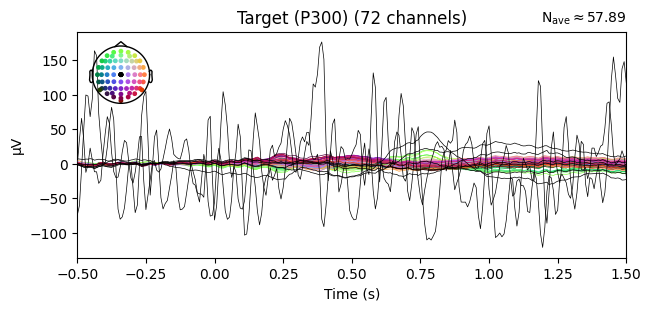

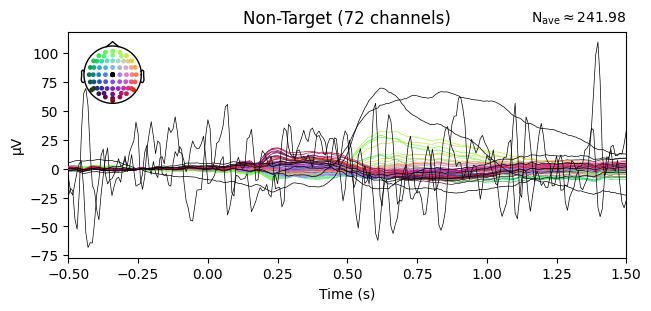

In [145]:
# evoked_target1.plot(spatial_colors=True, titles='Target (P300)')
# # evoked_subtarget.plot(spatial_colors=True, titles='SubTarget (P300)')
# evoked_nontarget1.plot(spatial_colors=True, titles='Non-Target')
# plt.show()
# evoked_target2.plot(spatial_colors=True, titles='Target (P300)')
# # evoked_subtarget.plot(spatial_colors=True, titles='SubTarget (P300)')
# evoked_nontarget2.plot(spatial_colors=True, titles='Non-Target')
# plt.show()
# evoked_target3.plot(spatial_colors=True, titles='Target (P300)')
# # evoked_subtarget.plot(spatial_colors=True, titles='SubTarget (P300)')
# evoked_nontarget3.plot(spatial_colors=True, titles='Non-Target')
# plt.show()
# evoked_target4.plot(spatial_colors=True, titles='Target (P300)')
# # evoked_subtarget.plot(spatial_colors=True, titles='SubTarget (P300)')
# evoked_nontarget4.plot(spatial_colors=True, titles='Non-Target')
# plt.show()
# evoked_target5.plot(spatial_colors=True, titles='Target (P300)')
# # evoked_subtarget.plot(spatial_colors=True, titles='SubTarget (P300)')
# evoked_nontarget5.plot(spatial_colors=True, titles='Non-Target')
# plt.show()
evoked_target.plot(spatial_colors=True, titles='Target (P300)')
evoked_nontarget.plot(spatial_colors=True, titles='Non-Target')
plt.show()

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\2610186841.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(


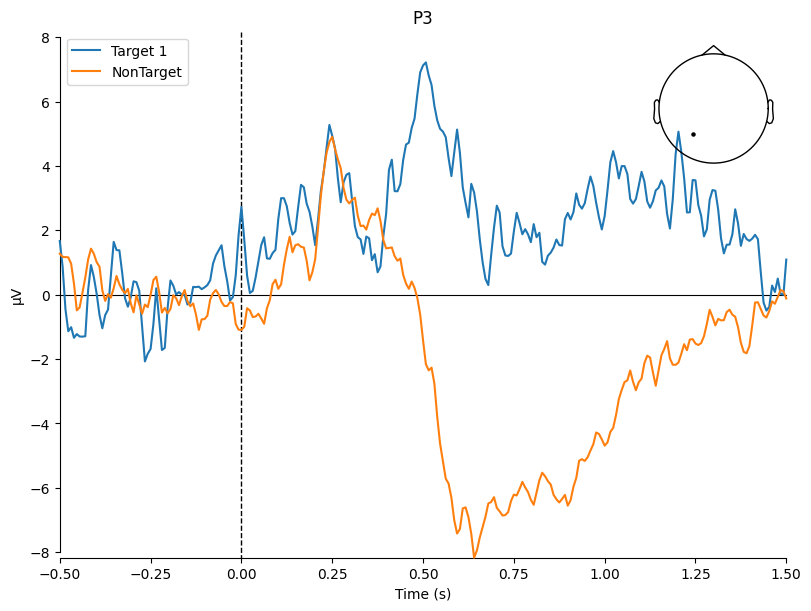

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\2610186841.py:11: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(


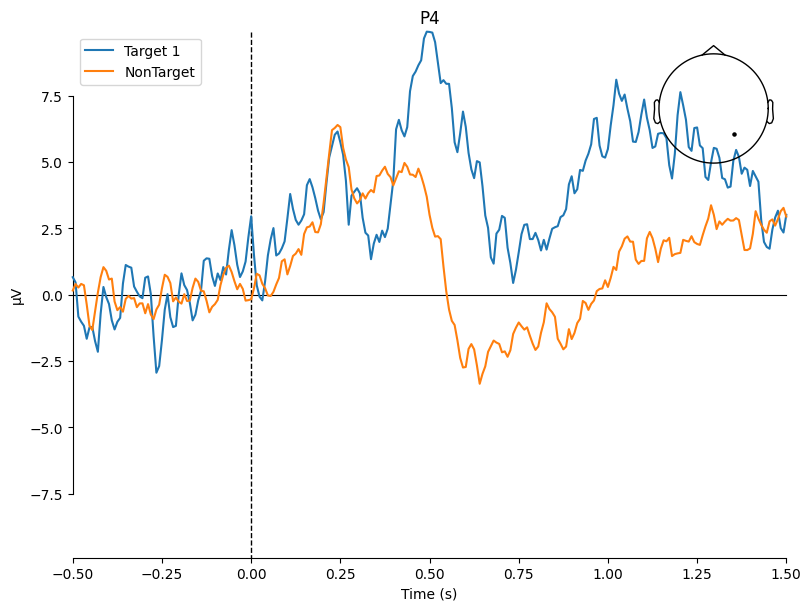

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\2610186841.py:21: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(


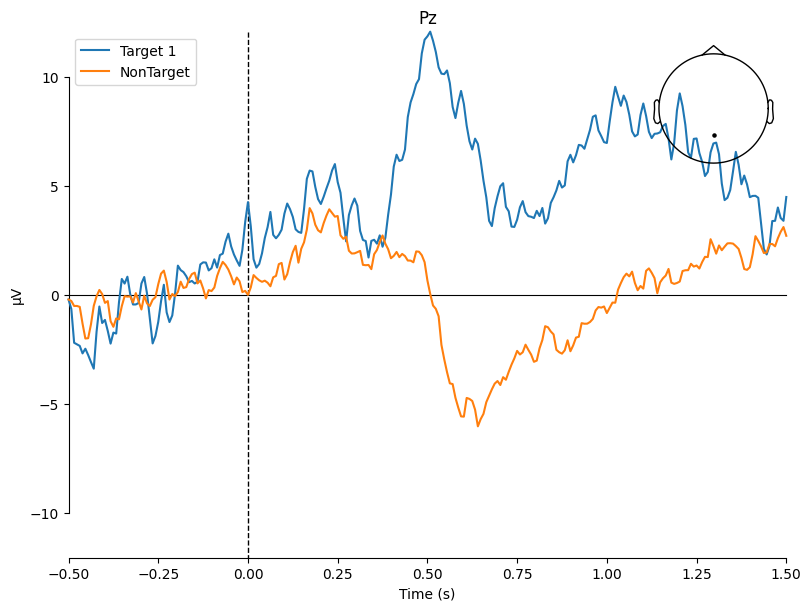

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\2610186841.py:31: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(


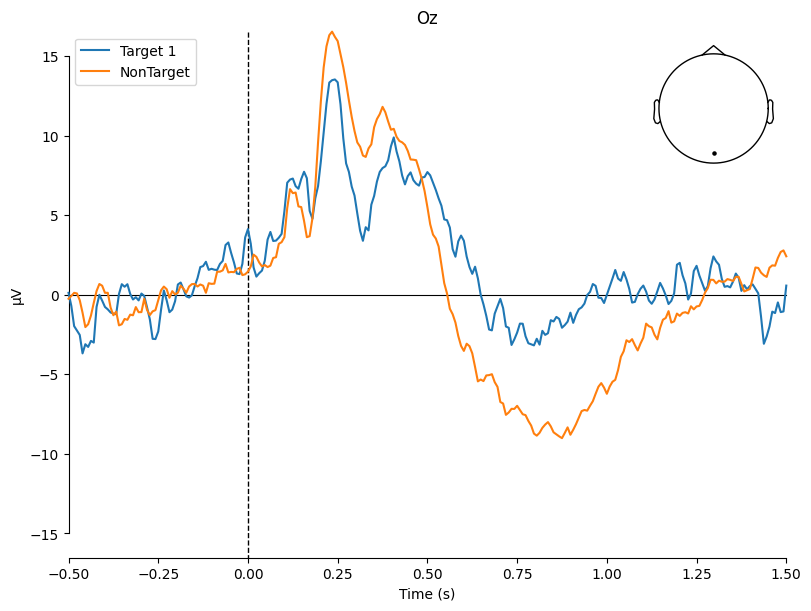

In [146]:
mne.viz.plot_compare_evokeds(
    {
        'Target 1': evoked_target,
        # 'Target 2': evoked_subtarget,
        'NonTarget': evoked_nontarget
    },
    picks='P3',
    combine='mean'
)
plt.show()
mne.viz.plot_compare_evokeds(
    {
        'Target 1': evoked_target,
        # 'Target 2': evoked_subtarget,
        'NonTarget': evoked_nontarget
    },
    picks='P4',
    combine='mean'
)
plt.show()
mne.viz.plot_compare_evokeds(
    {
        'Target 1': evoked_target,
        # 'Target 2': evoked_subtarget,
        'NonTarget': evoked_nontarget
    },
    picks='Pz',
    combine='mean'
)

mne.viz.plot_compare_evokeds(
    {
        'Target 1': evoked_target,
        # 'Target 2': evoked_subtarget,
        'NonTarget': evoked_nontarget
    },
    picks='Oz',
    combine='mean'
)
plt.show()

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3689443323.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks=pick, combine='mean', title=f'Compare Evokeds at {pick}')


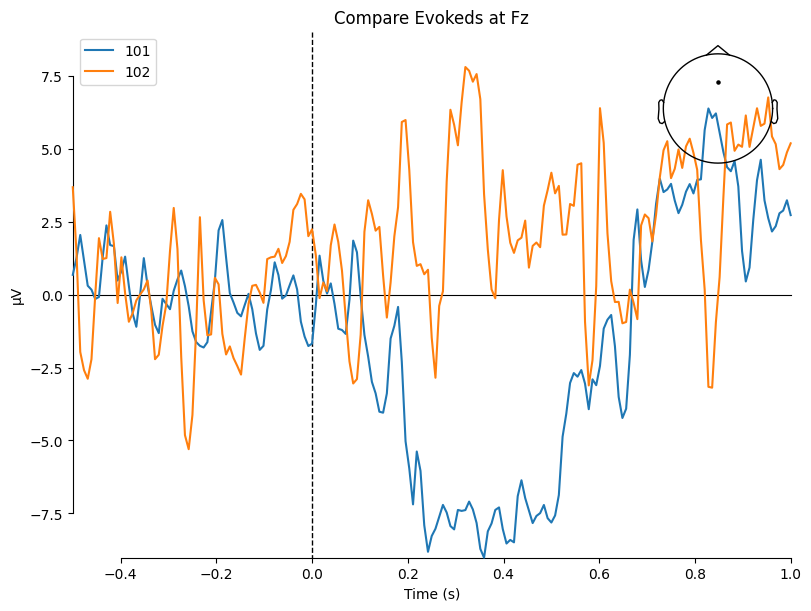

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3689443323.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks=pick, combine='mean', title=f'Compare Evokeds at {pick}')


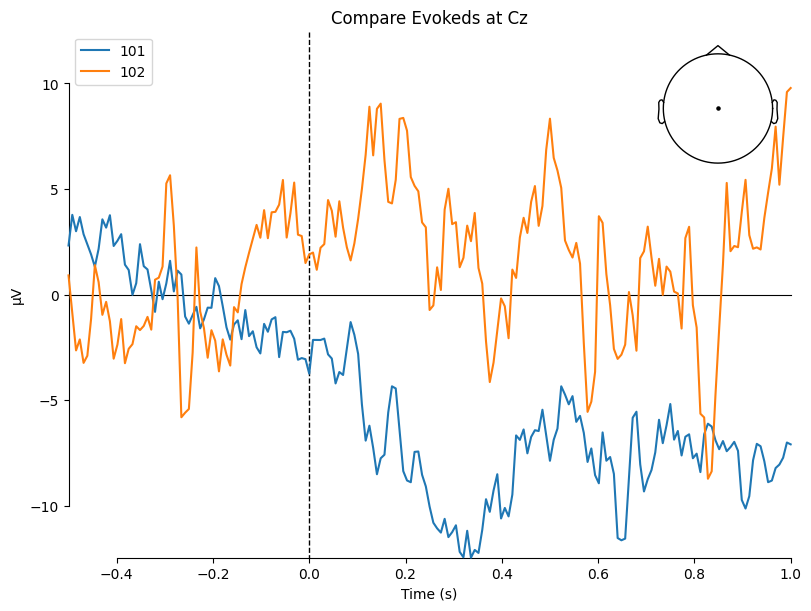

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3689443323.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks=pick, combine='mean', title=f'Compare Evokeds at {pick}')


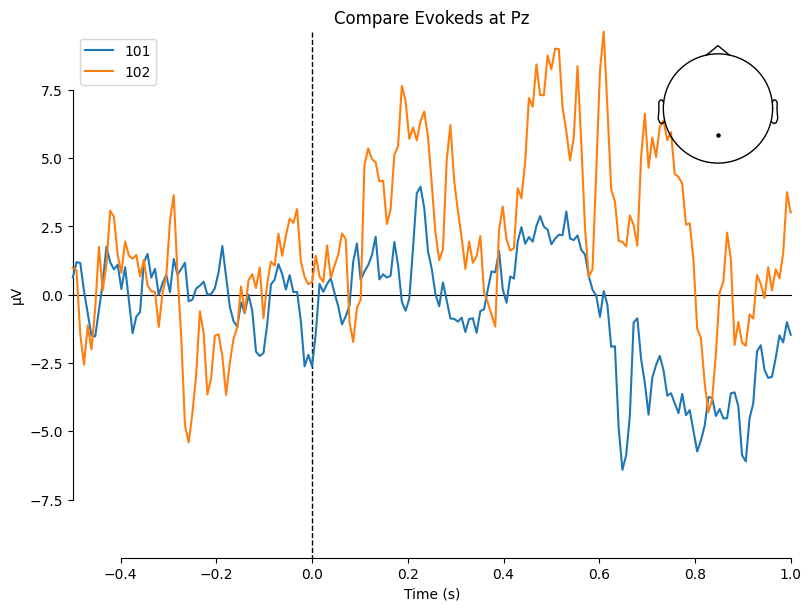

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3689443323.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks=pick, combine='mean', title=f'Compare Evokeds at {pick}')


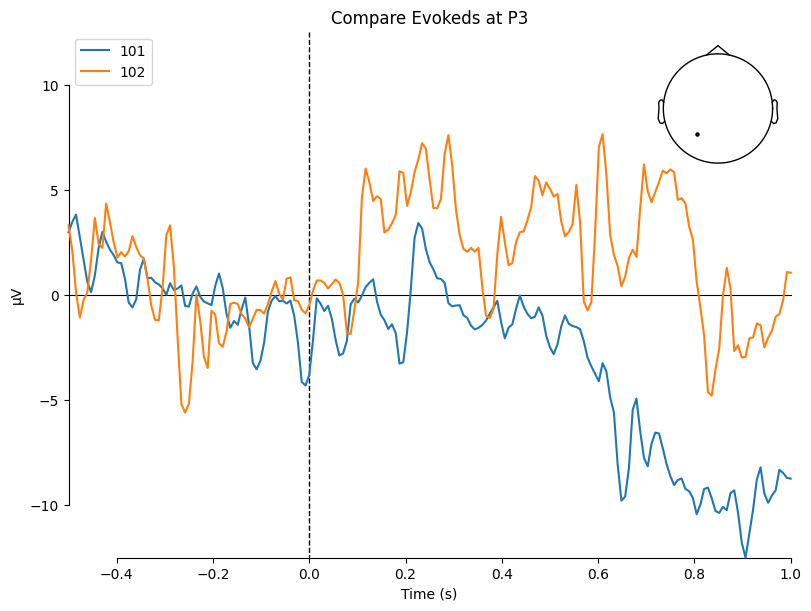

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3689443323.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks=pick, combine='mean', title=f'Compare Evokeds at {pick}')


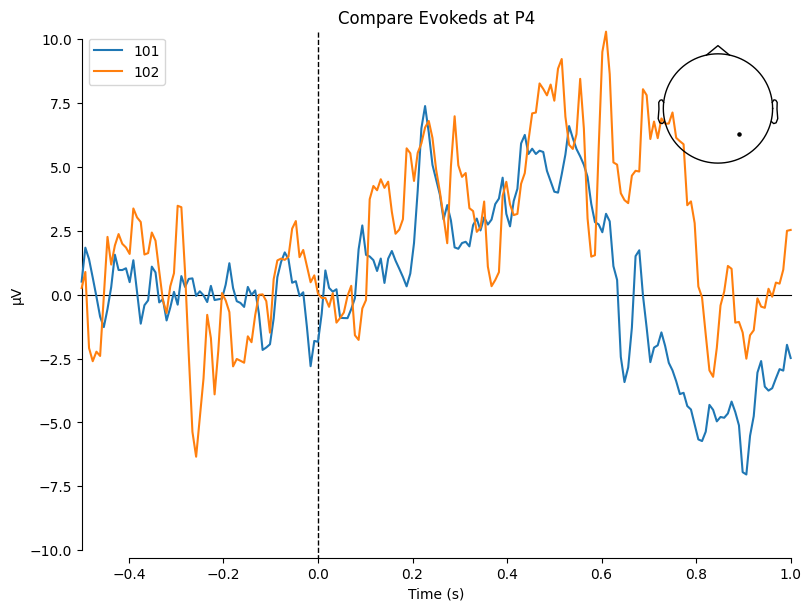

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3689443323.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks=pick, combine='mean', title=f'Compare Evokeds at {pick}')


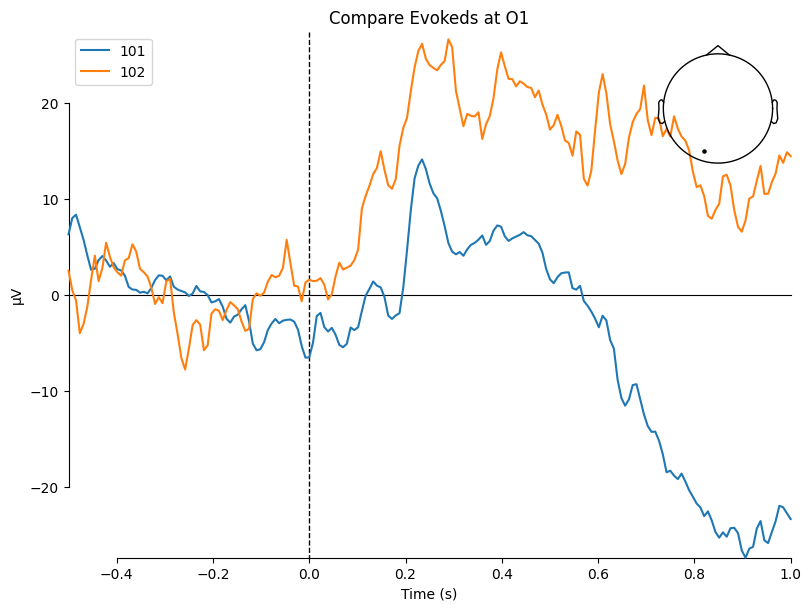

combining channels using "mean"
combining channels using "mean"


C:\Users\Aitthikit\AppData\Local\Temp\ipykernel_43236\3689443323.py:4: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks=pick, combine='mean', title=f'Compare Evokeds at {pick}')


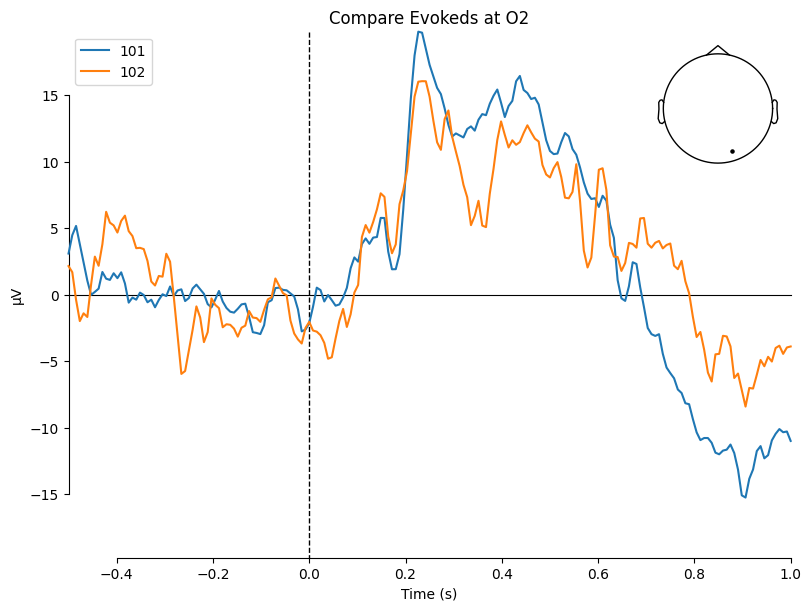

In [147]:
def plot_compare_evokeds_multi(Bio_Epochs, picks_list, event_ids=['101', '102']):
    evokeds = {eid: Bio_Epochs[eid].average() for eid in event_ids}
    for pick in picks_list:
        mne.viz.plot_compare_evokeds(evokeds, picks=pick, combine='mean', title=f'Compare Evokeds at {pick}')
        plt.show()

# Example usage:
plot_compare_evokeds_multi(Bio_Epochs, picks_list=['Fz', 'Cz', 'Pz','P3','P4','O1','O2'], event_ids=['101', '102'])


## 4.PSD plotting

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...
Plotting power spectral density (dB=True).
Averaging across epochs before plotting...


c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
c:\Users\Aitthikit\Desktop\bci_code\.venv\Lib\site-packages\mne\viz\utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


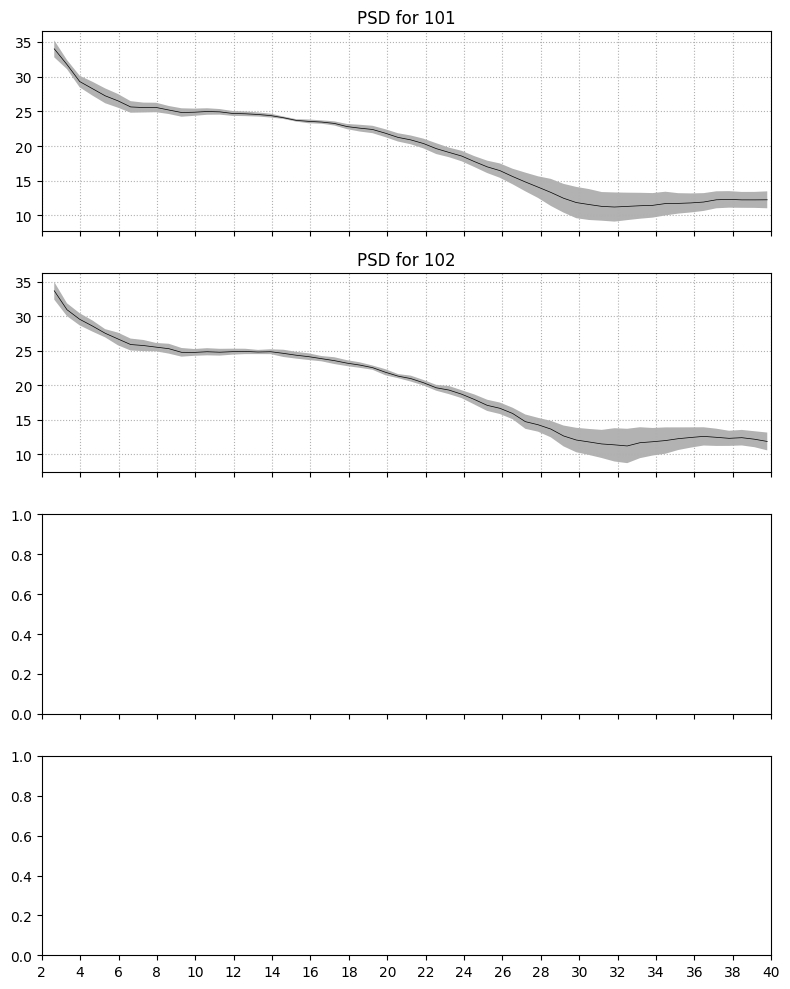

In [148]:
# Compute the PSD for different frequency epochs
ssvep_chans = ['Fz','Cz','Pz'] 
psd_101 = Bio_Epochs['101'].pick(ssvep_chans).compute_psd(fmin=2.0, fmax=40.0)
psd_102 = Bio_Epochs['102'].pick(ssvep_chans).compute_psd(fmin=2.0, fmax=40.0)
# psd_24Hz = Bio_Epochs['24Hz'].pick(ssvep_chans).compute_psd(fmin=2.0, fmax=40.0)
# psd_30Hz = Bio_Epochs['30Hz'].pick(ssvep_chans).compute_psd(fmin=2.0, fmax=40.0)

# Store PSD objects and titles
psd_data = [(psd_101, '101'), (psd_102, '102')]

# Create subplots (1 column, 4 rows)
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 10), sharex=True)

# Plot each PSD computation in a separate subplot
for ax, (psd, title) in zip(axes, psd_data):
    psd.plot(average=True, amplitude=False, picks="data", exclude="bads", axes=ax)
    ax.set_title(f'PSD for {title}')
    ax.set_xticks(np.arange(2, 41, 2))  # Set x-axis ticks from 2 to 60 Hz
    ax.set_xticklabels(np.arange(2, 41, 2))  # Set x-axis labels

plt.tight_layout()
plt.show()